# **Salifort Motors: Employee Churn Machine Learning Model**

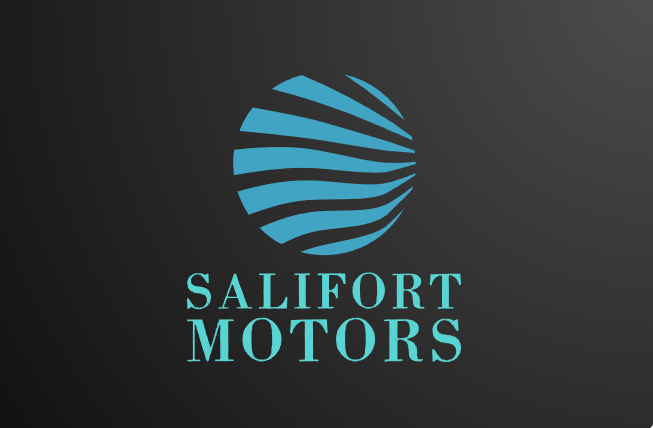

**Salifort Motors** is a French-based vehicle manufacturer focused in creating cars that run on electricity, solar power, algae, and hydrogen. Their HR department recently gave a survey to employees to look into their churn rates. The real concern is what the HR department should do with the results.

It is difficult, time-consuming, and expensive to find new employees due to the potential revenue and time being lost to interviewing candidates who may or not may not be qualified during times they should be working. As such, a **tree-based machine learning model** to predict employee churn could help increase employee retention, so that current employees are more likely to stay.


## **Pace: Plan**

### The HR survey dataset

15,000 rows and 10 columns

Source: [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

*   ``satisfaction_level``: Employee-reported job satisfaction level
*   ``last_evaluation``: Score of employee's last performance review
*   ``number_project``: Number of projects employee contributes to
*   ``average_monthly_hours``: Average number of hours employee worked per month
*   ``time_spend_company``: How long the employee has been with the company (years)
*   ``Work_accident``: Whether or not the employee experienced an accident while at work left
*   ``promotion_last_5yeears``: Whether or not the employee was promoted in the last 5 years
*   ``Department``: The employee's department
*   ``salary``: The employee's salary (U.S. dollars)

### Step 1. Import and load packages

In [ ]:
## Import packages ##

# Data manipulation
import pandas as pd
pd.set_option('display.max_columns', None)

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data modeling
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.model_selection import *
from sklearn.metrics import *

# The ability to save the models once we fit them
import pickle

In [ ]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_comma_sep.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Step 2. Data Exploration (Initial EDA and data cleaning)

#### Gather basic information about the data

In [ ]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### Gather descriptive statistics about the data

In [ ]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### Rename columns (for snake_case, spelling, and convenience)

In [ ]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
# Rename columns as needed
df0 = df0.rename(columns = {
    'average_montly_hours': 'average_monthly_hours',
    'time_spend_company': 'tenure',
    'Work_accident': 'work_accident',
    'Department': 'department'
})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

#### Check missing values

In [ ]:
# Check for missing values
df0.isna().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_monthly_hours,0
tenure,0
work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


**No missing values.**

#### Check duplicates

In [ ]:
# Check for duplicates
df0.duplicated().sum()

np.int64(3008)

**3008 duplicates.**

In [ ]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates(keep = 'first')

# Display first few rows of new dataframe as needed
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Check outliers

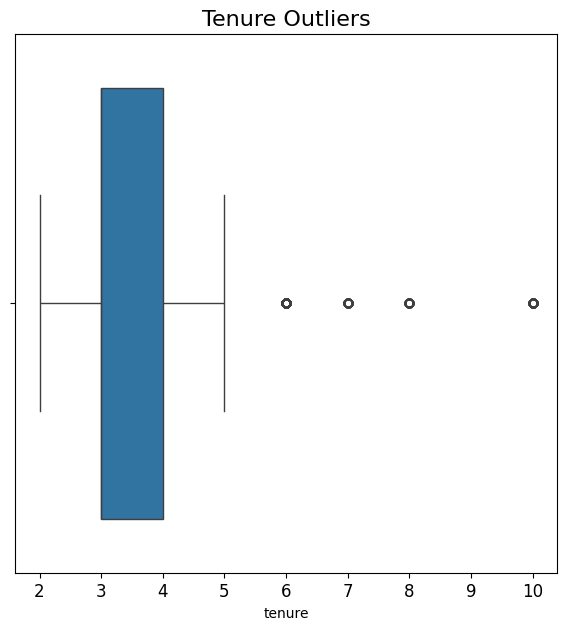

In [ ]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize = (7,7))
plt.title('Tenure Outliers', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.boxplot(x = df['tenure'])
plt.show();

In [ ]:
# Determine the number of rows containing outliers

# Percentiles and interquartile range of 'tenure'
percentile25 = df['tenure'].quantile(.25)
percentile75 = df['tenure'].quantile(.75)
iqr = percentile75 - percentile25

# Upper and lower limits for non-outliers of 'tenure'
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# Outlier evaluation
outliers = df[(df['tenure'] > upper_limit) | (df['tenure'] < lower_limit)]
print('Outlier count:', len(outliers))

Outlier count: 824


**824 rows have outliers.**

## **pAce: Analyze**

### Step 1. Continued EDA

In [ ]:
# Get numbers of people who left vs. stayed
print(df['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(df['left'].value_counts(normalize = True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


**17% of employees churned.**

#### Data visualizations

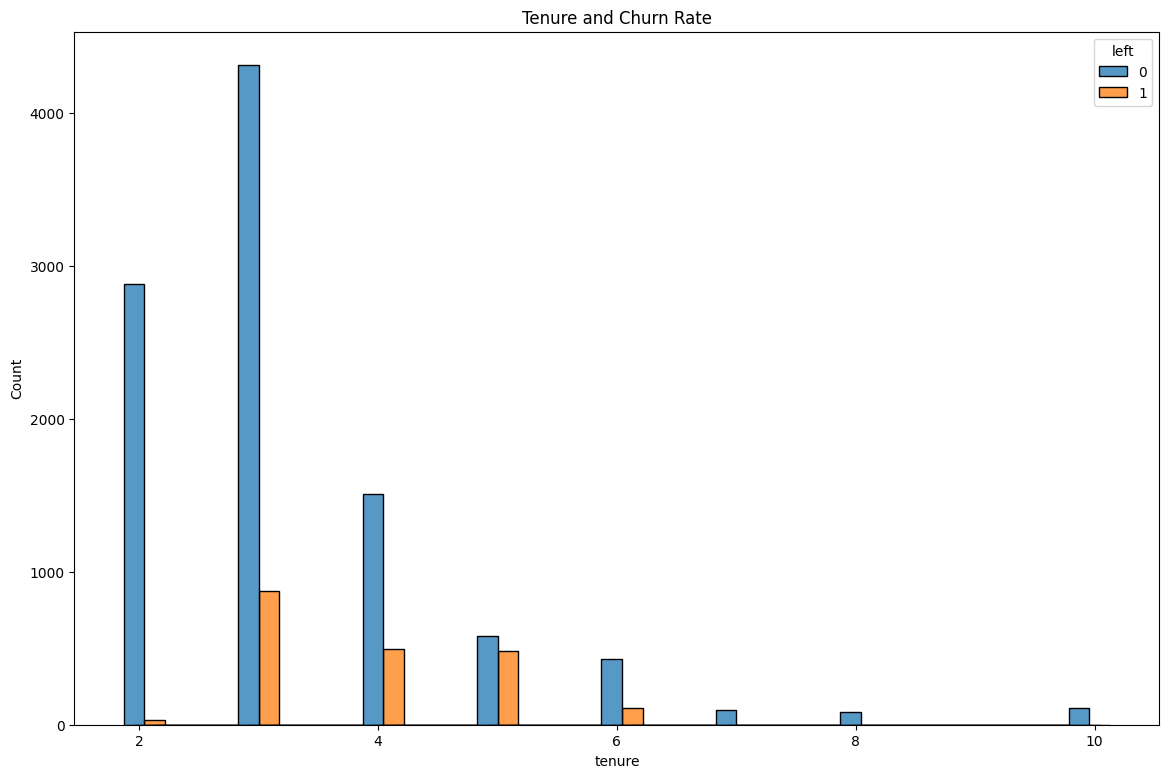

In [ ]:
# Tenures of Churn Rate
plt.figure(figsize = (14, 9))
tenure_stay = df[df['left'] == 0]['tenure']
tenure_left = df[df['left'] == 1]['tenure']
sns.histplot(data = df, x = 'tenure', hue = 'left', multiple = 'dodge', shrink = 4)
plt.title('Tenure and Churn Rate')

plt.show()

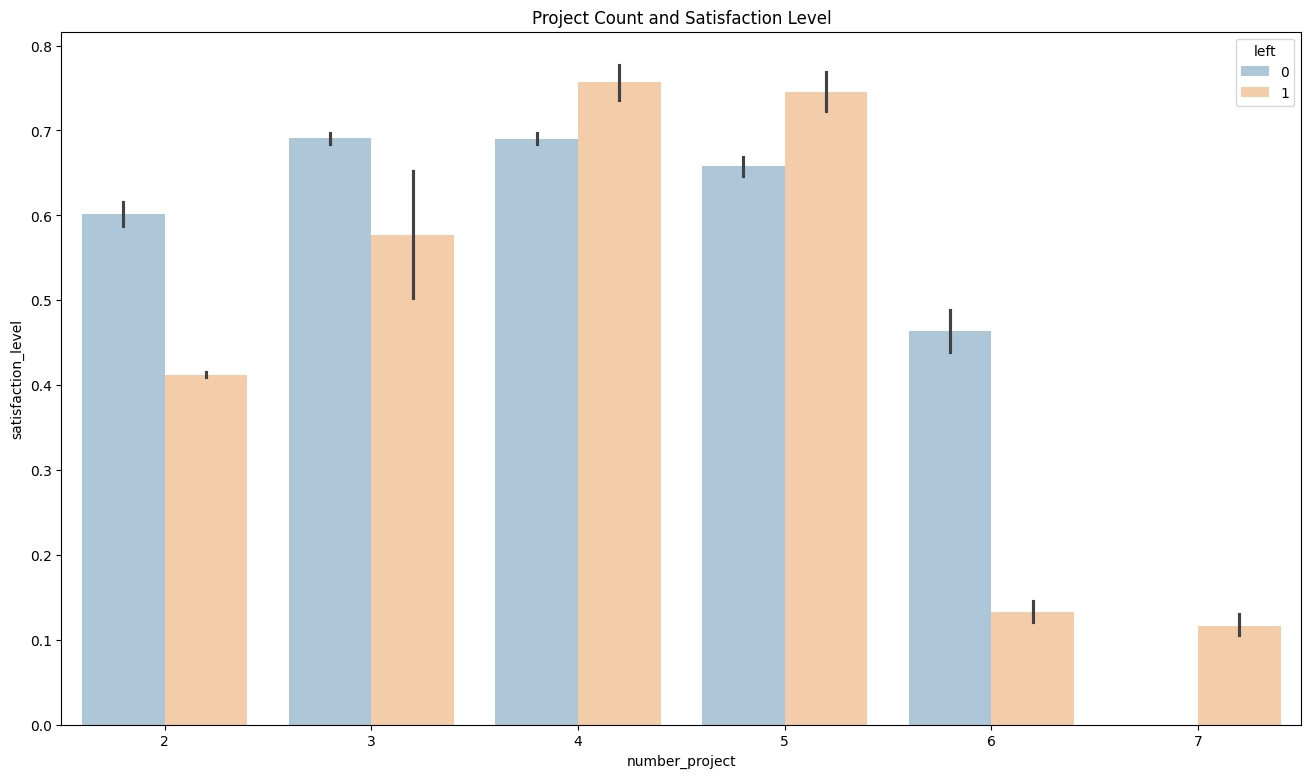

In [ ]:
# Project Count and User Churn
plt.figure(figsize = (16,9))
sns.barplot(data=df, x='number_project', y='satisfaction_level', hue='left', alpha=0.4)
plt.title('Project Count and Satisfaction Level');

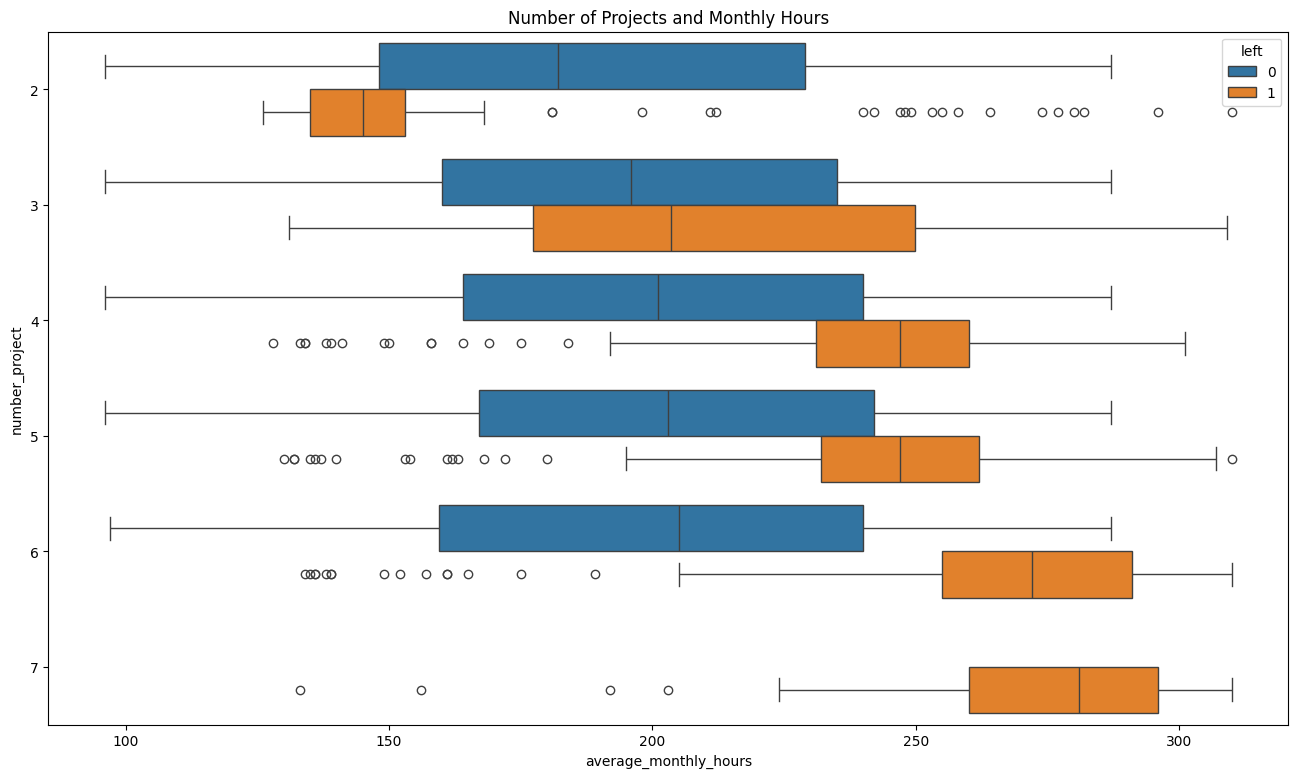

In [ ]:
# Projects and Monthly Hours
plt.figure(figsize = (16,9))
sns.boxplot(data = df, x='average_monthly_hours', y = 'number_project', hue = 'left', orient = 'h')
plt.title('Number of Projects and Monthly Hours');

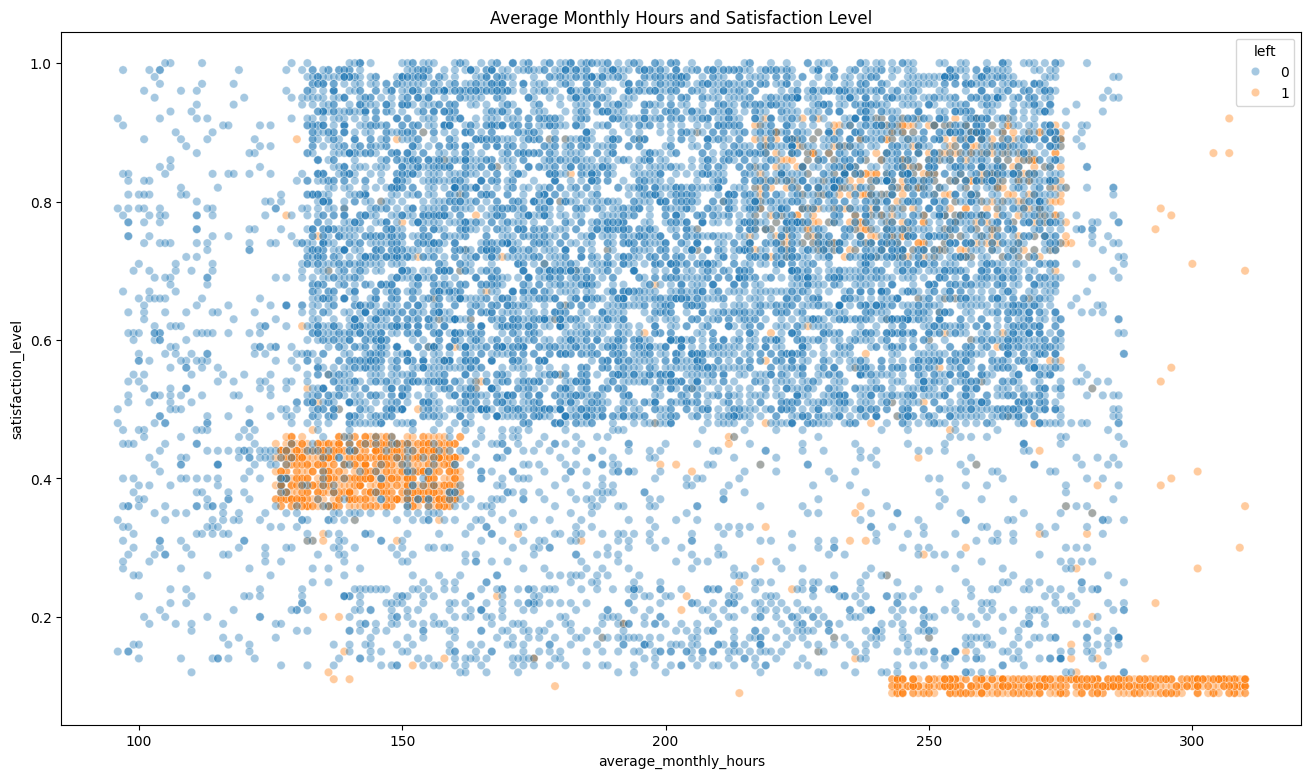

In [ ]:
# Evaluation Score and Average Monthly Hours
plt.figure(figsize = (16,9))
sns.scatterplot(data = df, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left', alpha = 0.4)
plt.title('Average Monthly Hours and Satisfaction Level');

#### Insights

- All of the employees with seven projects have churned.
- Greater tenure generally means less churning, excluding those with 2 years.
- For churned employees, the average monthly hours worked per month generally increases with the number of projects.
- Churned employees are typically less satisfied with increased average monthly hours.
 - They could be at 150 monthly hours with an evaluation score of ~0.4, or they could be well over 300 with a satisfaction level of 0.
 - Some have also left with 210-270 monthly hours with satisfaction levels of 0.7-0.9, but they blend in with non-churned employees.

## paCe: Construct

## Step 3. Model Building, Step 4. Results and Evaluation

### Type of prediction task

The goal is to create a machine learning model that predicts whether an employee leaves the company or not. This task is about **binary classification** since the `left` column is either 0 (retained) or 1 (churned).

### The most appropriate model

We could either use a logistic regression model or a tree-based model. Today, I'll be using the **decision tree** model. I most recently worked with these, and they're require very little preprocessing data. To save some time, I'll be using the regular one without the random forest, as we can get accurate results while using very little preprocessing power.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [ ]:
# Copy the dataframe
df_enc = df.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


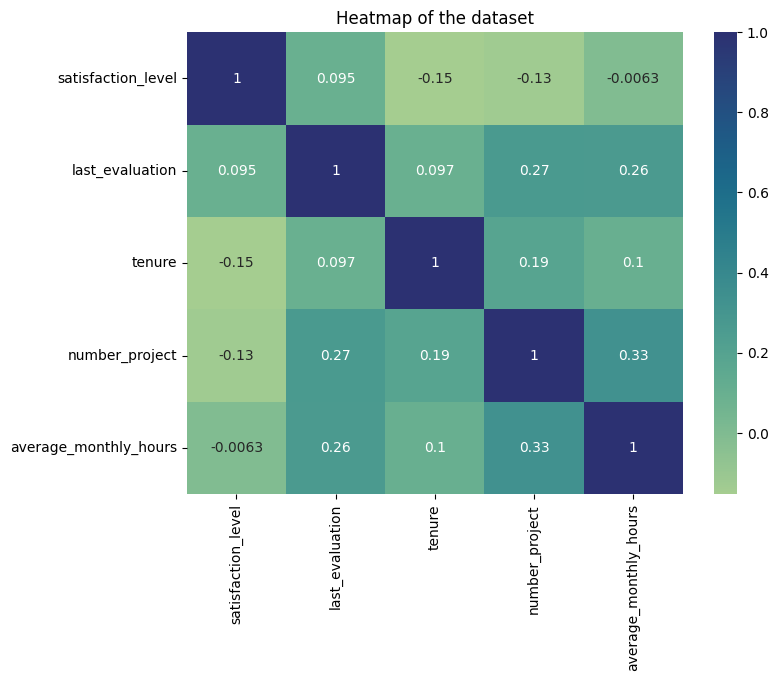

In [ ]:
# Heatmap of encoded dataset
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'tenure', 'number_project', 'average_monthly_hours']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

Employees' satisfaction levels are **negatively correlated** with their tenure (-0.15), number of projects (-0.13), and average monthly hours (-0.0063). Meanwhile, their last evaluation scores are **positively correlated: 0.095**
- Employees are more satisfied with higher evaluation scores, but they become unsatisfied when they stay longer and get more work.

The highest correlation is between the number of projects and average monthly hours: **0.33**. The more projects an employee gets, the more likely they are to work more hours.

In [ ]:
# Isolate the outcome variable
y = df_enc['left']

# Display the first few rows of `y`
y.head()

,left
0,1
1,1
2,1
3,1
4,1


In [ ]:
# Select the features
X = df_enc.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [ ]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 6.22 s, sys: 0 ns, total: 6.22 s
Wall time: 6.29 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [ ]:
# Find the best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [ ]:
# Find the best AUC score on the CV
tree1.best_score_

np.float64(0.969819392792457)

In [ ]:
# Pre-defined function to get the resulting metrics from the model.

def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc

    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })

    return table

In [ ]:
# Using the make_results() function above
tree1_cv_results = make_results('Decision Tree', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree,0.914552,0.916949,0.915707,0.971978,0.969819


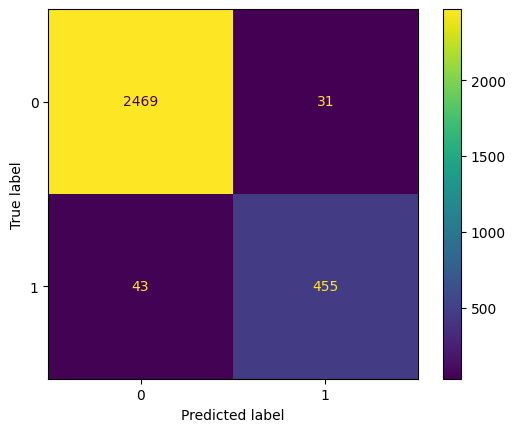

In [ ]:
# Confusion matrix
preds = tree1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels = tree1.classes_)

# Plotting the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tree1.classes_)
display.plot(values_format = '');

_Positive = churn, negative = no churn_

*   **True negative: 2469**
*   False negative: 43
*   False positive: 31
*   **True positive: 455**

**~98% of predictions are accurate.**



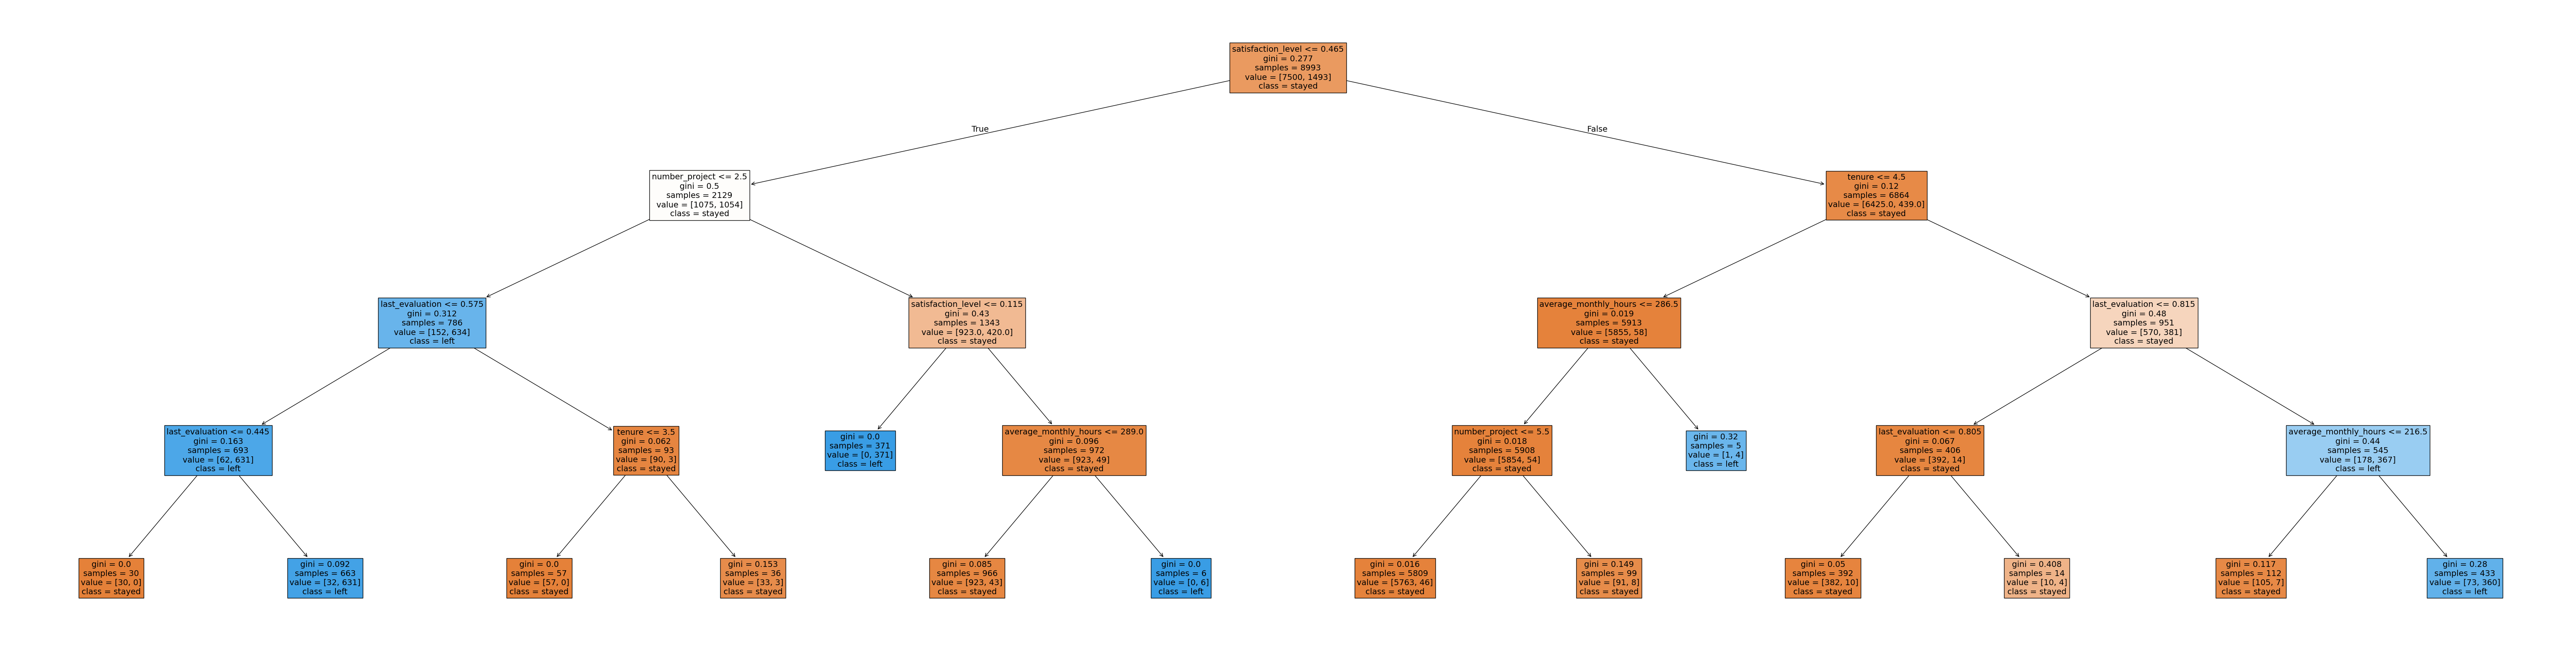

In [ ]:
# Decision tree splits
plt.figure(figsize = (80, 20))
plot_tree(tree1.best_estimator_, max_depth = 4, fontsize = 14, feature_names = X.columns,
         class_names = {0: 'stayed', 1: 'left'}, filled = True);
plt.show();

In [ ]:
# Determine decision tree importance with Gini
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=X.columns
                                )
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

,gini_importance
satisfaction_level,0.524622
last_evaluation,0.178501
tenure,0.120792
number_project,0.117102
average_monthly_hours,0.058983


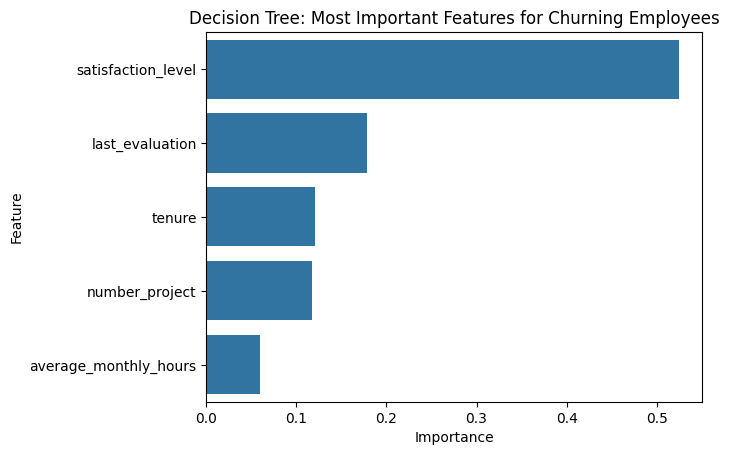

In [ ]:
# Bar chart to visualize the most important features as determined above
sns.barplot(data = tree1_importances, x = 'gini_importance', y = tree1_importances.index, orient = 'h')
plt.title('Decision Tree: Most Important Features for Churning Employees')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

From the decision tree, it's clear that the **satisfaction level** is the most important feature when it comes to employee churn, with a gini importance of ~0.52.
*   Low satisfaction is more likely to cause employee churn.
*   Employees do not want to work somewhere they're not happy at.

## **pacE: Execute**

### Evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






### Summary of model results

The most importance features, according to the tree-based model, are:
- satisfaction_level
- last_evaluation
- tenure
- number_project
- average_monthly_hours

This makes sense because based on the visualizations created earlier, a low satisfaction level corresponds to a poor evaluation, leading to a high churn rate of this area. Had we done other models, these variables may have been different.

### Conclusion, Recommendations, Next Steps

For a more accurate test, we may consider trying different models for comparison. For example, we might try logistic regression to not use any decision trees at all. Or if we are to still use them, we could try to find more time for the random tree one. We could even try both!

As for the model itself, **data leakage is still a concern.** The predictions may change drastically when we use different types of models but the same random samples. This all depends on the processing power of the computer. In this case, more tests and model building may be necessary.